<a href="https://colab.research.google.com/github/paella-e/butterfly/blob/main/capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔹 **00. Butterfly Classification Notebook Overview**

This notebook builds a butterfly classification model using the [TensorFlow](https://www.tensorflow.org/guide/basics) framework and an immage classificaiton model from [Kaggle](https://www.kaggle.com/models?task=16686&framework=tensorFlow2). There are 75 different classifications (species) of butterfly.

**Data**: [Butterfly Image Classification](https://www.kaggle.com/datasets/phucthaiv02/butterfly-image-classification) dataset from Kaggle.

* There are 6,499 labeled images in the training set.
* There are 2,786 unlabeled images in the test set.


#### **⮞ About the Model:**
We will be using the "[mobilenet_v2 model](https://www.kaggle.com/models/google/mobilenet-v2)" from Kaggle as it is a popular image classification model that has been tested by many users and includes detailed documentation.

# 🔹 01. Getting the Notebook ready: Import libraries & Utilize GPU

#### ⮞ **Step 1: Import Libraries**

For the machine learning portion, we will be using the TensorFlow framework and a model from Kaggle. Additionally, we will use popular Python libraries Pandas and NumPy to extend our Python functionality.

In [32]:
# import tensorflow as tf
# import tf_keras as keras


!pip install tensorflow==2.15.0
!pip install q keras==2.15.0
import tensorflow as tf
from tensorflow import keras
print("TensorFlow version: ")
print(tf.__version__)

import tensorflow_hub as hub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split



TensorFlow version: 
2.15.0
Keras version: 


#### ⮞ **Step 2: Change Runtime from CPU to GPU**

Machine Learning applications benefit from running on a GPU rather than CPU, so we will want to change our Runtime environment. This will allow us to train and run our model faster.


* In Google Colab, go to Runtime > Change runtime type > GPU > Save
* This notebook was made with the T4 GPU option


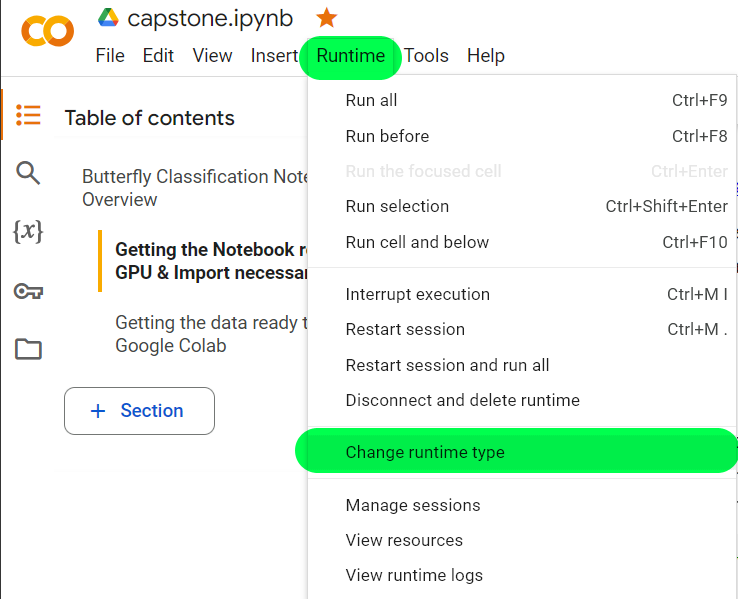

In [2]:
# Print statement to confirm we have succesfully changed our runtime to use a GPU.
print("Success: Using GPU") if tf.config.list_physical_devices() else "Warning: not using GPU"

Success: Using GPU


# 🔹 02. Getting the data ready to use in Google Colab



#### ⮞ **Step 1. Downloading and Unzipping Data**

1. Download the [Butterfly Image Classificaiton](https://www.kaggle.com/competitions/cloud-recognition/data) dataset from Kaggle.
2. Upload the zip file to Google Drive
  * If you cannot use Google Drive, you can upload the data directly to the session, however it will expire with the session and need to be re-uploaded in every subsequent session.
3. Unzip it with the following command:
> !unzip "*ZIP FILE LOCATION*" -d "*DESTINATION PATH*"


---



In [3]:
# Remove the hashtag symbol at the start of the line below and then re-run the cell to run the unzip command if needed
#!unzip "/content/drive/MyDrive/Butterfly/archive.zip" -d "/content/drive/MyDrive/Butterfly/"

#### ⮞ **Step 2. Exploring the Data**

In this step we're importing the **training labels csv file into a dataframe**, 📊 `training_labels_csv`, and then confirming that the data matches the description on Kaggle and determining if the data needs cleaning.

⮞ TOTAL LABELS & UNIQUE LABELS COUNT: 
           filename           label
count          6499            6499
unique         6499              75
top     Image_1.jpg  MOURNING CLOAK
freq              1             131



⮞ Sampling the data - the first 10 entries in the CSV/dataframe
       filename                     label
0   Image_1.jpg          SOUTHERN DOGFACE
1   Image_2.jpg                    ADONIS
2   Image_3.jpg            BROWN SIPROETA
3   Image_4.jpg                   MONARCH
4   Image_5.jpg  GREEN CELLED CATTLEHEART
5   Image_6.jpg           CAIRNS BIRDWING
6   Image_7.jpg  GREEN CELLED CATTLEHEART
7   Image_8.jpg      EASTERN DAPPLE WHITE
8   Image_9.jpg            BROWN SIPROETA
9  Image_10.jpg               RED POSTMAN



⮞ DATA VISUALIZATION


<Axes: ylabel='count'>

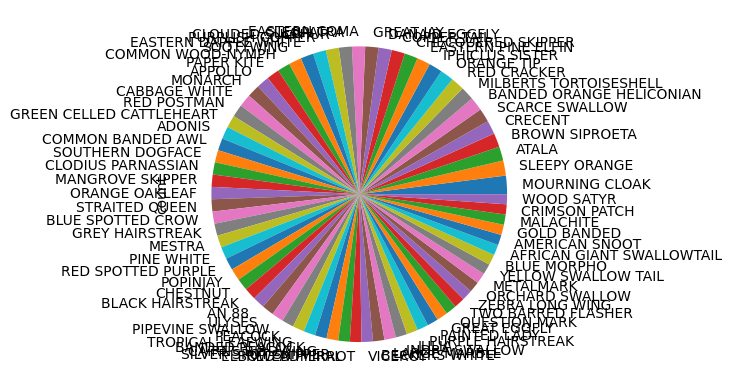

In [4]:
# Create a dataframe of the labels for the training data
training_labels_csv = pd.read_csv("/content/drive/MyDrive/Butterfly/Training_set.csv")

# Confirming each image in our training set has a label
# There are 6,499 training images so there should be 6,499 labels
print("⮞ TOTAL LABELS & UNIQUE LABELS COUNT: ")
print(training_labels_csv .describe())
print(end='\n\n\n')

# Checking to see what the labeled data from the csv file looks like
print("⮞ Sampling the data - the first 10 entries in the CSV/dataframe")
print(training_labels_csv .head(10))
print(end='\n\n\n')

# Visualization of the distribution of images per label
print("⮞ DATA VISUALIZATION")
training_labels_csv ["label"].value_counts().plot.pie()

#### ⮞ **Step 3. Converting Data**
Because we are using TensorFlow to train our model, we need to convert our data (labels and the images) into tensor objects.

Tensors are multi-dimensional array objects, somewhat similar to Python arrays. TensorFlow documentation is [here](https://www.tensorflow.org/guide/tensor).

##### **3a. LABELS: converting labels into tensor objects**

Using the dataframe of the training data csv created in step 2, we will create several arrays:
* 📋 `labels` : all labels
* 📋 `species`: unnique labels
* 📋 `bool_labels`: all labels in T/F format

The boolean array conversion is needed to be able to use it with TensorFlow.

In [5]:
# --- Making Lists ---
# ---

# Making an array of all of the labels (strings) in the label column only (ie image file names not included)
labels = training_labels_csv["label"].to_numpy()

# Using the labels array, this makes a new array of strings of all the unique label categories (species)
species = np.unique(labels)

# We cannot use strings to train, so we turn every label into a boolean array as TensorFlow requires numerical data (integer)
# for images and labels, and bool will be either T or F / 1 or 0
bool_labels = [label == species for label in labels]

# --- Checking ---
# ---

# Checking the length of each array
print("Number of unique species (it should be 75): " + str(len(species)))
print("Number of total labels (it should be 6,499): " + str(len(labels)))
print("Number of boolean labels (it should be 6,499): " + str(len(bool_labels)))

# Bool label as is (T/F)
print("Testing T/F label")
print(bool_labels[0])

# Bool label as 0/1
print("Testing 0/1 label")
print(bool_labels[0].astype(int))



# Turning bool array into integer because tensorflow works with integers
# print(labels[0]) # Original label
# print(np.where(species == labels[0])) # index where label occurs
# print(bool_labels[0].argmax()) # index where label occurs in the bool array
# print(bool_labels[0].astype(int)) #there will be a 1 where the sample label occurs




Number of unique species (it should be 75): 75
Number of total labels (it should be 6,499): 6499
Number of boolean labels (it should be 6,499): 6499
Testing T/F label
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False]
Testing 0/1 label
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0]


##### **3b. IMAGES: loading images and converting them into tensor objects**

Creaing a function 🔨 `convert_img` to convert images.

For more information, check "Load and preprocess images" [documentation](https://www.tensorflow.org/tutorials/load_data/images).

In [39]:
# Making a list of filenames (including path) for all of the images in the training data
# This time we're only looking at the filename column in the csv/dataframe and not using the label column
filenames_list = ["/content/drive/MyDrive/Butterfly/train/" + imgname for imgname in training_labels_csv["filename"]]

# Forcing a uniform image size in case any of our images are a different size.
img_height = 224
img_width = 224

# This function converts all of our images into a uniform size and then into tensor objects.
def convert_img(file_path):
  # Loads the raw data from the file as a string
  img = tf.io.read_file(file_path)
  # Converts the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img, channels=3)
  # Squishes the normal RGB values from a 0-255 scale to 0-1 scale (normalization)
  img = tf.image.convert_image_dtype(img, tf.float32)
  # Resizes the image to our specified size
  img = tf.image.resize(img, size=[img_height, img_width])
  return img

##### **3c. VALIDATION: creating a validation set**

Best practice dictates using a validation set. We're creating a training and validation set split using functionality from Scikit-Learn.

In [7]:
x = filenames_list
y = bool_labels

# Splitting the training set into training and validation sets, and setting a random state for reproducable randomization.
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=5)


# Testing to confirm the data has been split into 20/80
len(x_train), len(y_train), len(x_val), len(y_val)

(5199, 5199, 1300, 1300)

##### **3d. PAIRING & BATCHING**

Now that we have our images and labels in tensor objects, we:

* Create a function 🔨`pair_objects` to pair an image and its label together.

* Create a function 🔨`batch_data` to batch the data in batches of 32 as it is easier to process large data sets such as the ones we have in batches. Can support batching of training or validation data (e.g. img + label), or test data (no label).

In the case of training data only, it is shuffled. Accoridng to GeeksForGeeks, "Shuffling the data helps prevent bias during training, ensures randomness in batch selection, and prevents the model from learning patterns based on the order of the data" (2024). [link](https://www.geeksforgeeks.org/why-should-the-data-be-shuffled-for-machine-learning-tasks/)

In [8]:
# --- PAIRING DATA AND LABELS ---
# ---------------------------------------

# Returns a paired image and label after they've been converted to tensor objects
def pair_objects(file_path, label):
  img = convert_img(file_path)
  return img, label

# Testing function from 3b
# (convert_img(x[0]), tf.constant(y[0]))

In [9]:
# --- BATCHING DIFFERENT DATA SETS ---
# ---------------------------------------

batch_size = 32

def batch_data(x, y = None, size = batch_size, validation_set = False, test_set = False):

  # Test data batching (data without labels)
  if test_set:
    print("Batching: test data")
    data = tf.data.Dataset.from_tensor_slices(tf.constant(x))
    data_batch = data.map(convert_img).batch(batch_size)
    return data_batch

  # Validation data batching (data with labels)
  elif validation_set:
    print("Batching: validation data")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y))) # x = file_path, y = label
    data_batch = data.map(pair_objects).batch(batch_size)
    return data_batch

  # Training data batching (data with labels)
  else:
    print("Batching: training data")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y))) # x = file_path, y = label
    data = data.shuffle(buffer_size=len(x))
    data_batch = data.map(pair_objects).batch(batch_size)
  return data_batch


In [10]:
# Testing the batching function
train_data = batch_data(x_train, x_train)
validation_data = batch_data(x_val, y_val, validation_set=True)

Batching: training data
Batching: validation data


##### **⚠️⚠️⚠️ 3e. VISUALIZING: Data Visualization #2**
=====> OPTIONAL? TAKE OUT LATER IF I HAVE ENOUGH VISUALS
⚠️ = tutorial 235

Visualizing the data after it has been batched.

In [11]:
# def visualize_labeled_data(img, label):


# 🔹 03. Setting up a Model


#### ⮞ **Step 1: Function to build model**

 is 🔨`build_model()`

In [43]:
# Although we resized the images to 224x224 pixels earlier in the data conversion process,
# the model we selected requires that the images that are 128 x 128 pixels so we will define that here

img_height = 128
img_width = 128

# Params needed to build our model
input_shape = (None, img_height, img_width, 3)
output_shape = len(species) # This should still be 75
model_url = "https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/035-128-classification/2"

# This function builds a model using Keras
def build_model(input_shape=input_shape, output_shape=output_shape, model_url=model_url):

  model = tf.keras.Sequential([
    hub.KerasLayer(model_url), # INPUT (layer 1)
    tf.keras.layers.Dense(units=output_shape,
                          activation="softmax") # OUTPUT (layer 2) - softmax is better for multi-class
  ])

  # Compiling the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Build the model
  model.build(input_shape)

  return model

model = build_model()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_10 (KerasLayer  (None, 1001)              1692489   
 )                                                               
                                                                 
 dense_9 (Dense)             (None, 75)                75150     
                                                                 
Total params: 1767639 (6.74 MB)
Trainable params: 75150 (293.55 KB)
Non-trainable params: 1692489 (6.46 MB)
_________________________________________________________________


#### ⮞ **Step 2: Callbacks: monitoring our  model**

[TensorFlow Keras callback documentation](https://www.tensorflow.org/guide/keras/writing_your_own_callbacks)